In [57]:
base_model = MobileNet(weights='imagenet', include_top=False)
#add_layer

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
x = Dense(1024, activation='relu')(x)
x = Dense(512, activation='relu')(x)
preds = Dense(3, activation='softmax')(x)
#Assign transfer learning model to new model

model = Model(inputs=base_model.input, outputs=preds)
model.summary() #Before freezing

Model: "model_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_10 (InputLayer)       [(None, None, None, 3)]   0         
                                                                 
 conv1 (Conv2D)              (None, None, None, 32)    864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, None, None, 32)   128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, None, None, 32)    0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, None, None, 32)   288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, None, None, 32)   128       
 ation)                                                    

In [58]:
for layer in model.layers[:5]:
    layer.trainable = True

for layer in model.layers[8:10]:
    layer.trainable = False

for layer in model.layers[20:-1]:
    layer.trainable = True

model.summary() #After freezing

Model: "model_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_10 (InputLayer)       [(None, None, None, 3)]   0         
                                                                 
 conv1 (Conv2D)              (None, None, None, 32)    864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, None, None, 32)   128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, None, None, 32)    0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, None, None, 32)   288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, None, None, 32)   128       
 ation)                                                    

Found 175 images belonging to 3 classes.
Found 31 images belonging to 3 classes.


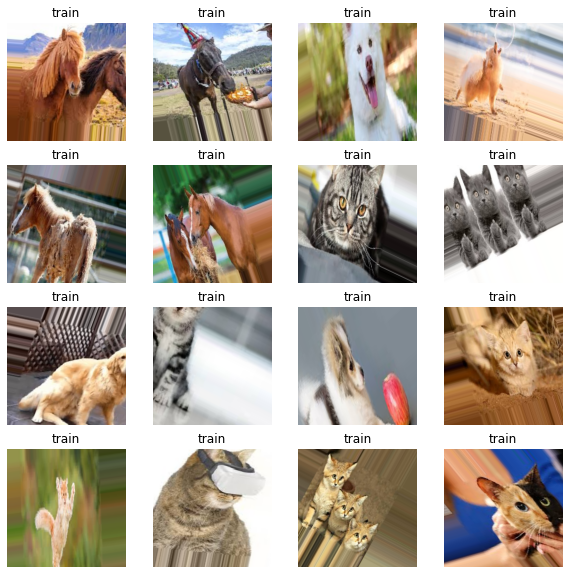

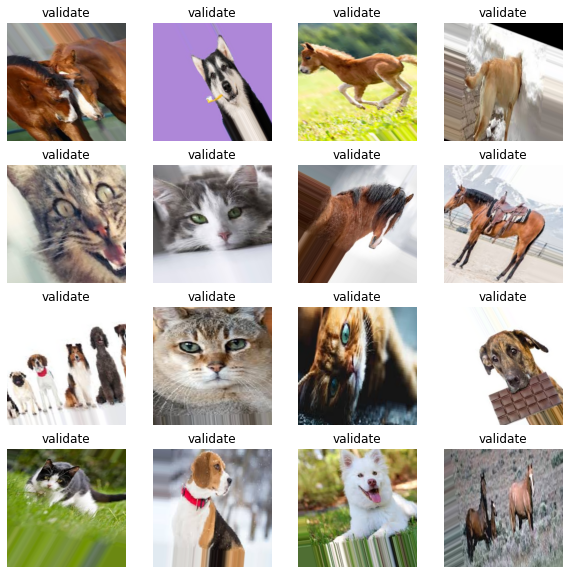

In [59]:
seed_value = 42
# Image generator

datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2,rotation_range=30, width_shift_range=0.2, height_shift_range=0.2, horizontal_flip=True, zoom_range=0.5,shear_range=0.15,fill_mode='nearest')
#Generate training and validation data

train_generator = datagen.flow_from_directory( './Cat_Dog_Horse/train/', target_size=(224,224), batch_size=32, class_mode='categorical',color_mode='rgb' , seed=seed_value,shuffle=True)
val_generator = datagen.flow_from_directory( './Cat_Dog_Horse/validate/', target_size=(224,224), batch_size=16, class_mode='categorical',color_mode='rgb' , seed=seed_value,shuffle=True)
def preview_image(datagen):
    x,y = datagen.next()
    plt.figure(figsize=(10,10))
    for j in range(0,16):
        plt.subplot(4,4,j+1)
        plt.imshow(x[j])
        plt.title(str(datagen.directory).split('/')[2])
        plt.axis('off')
    plt.show()

preview_image(train_generator) #Preview training images
preview_image(val_generator) #Preview validation images

In [60]:
model.compile(optimizer=Adam(lr=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

C:\Users\SHIBASAN\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [61]:
step_size_train=train_generator.n//train_generator.batch_size
step_size_val=val_generator.n//val_generator.batch_size
print(step_size_train)
print(step_size_val)

5
1


In [63]:
EP = 20
history = model.fit_generator(train_generator, steps_per_epoch=step_size_train, epochs=EP, validation_data=val_generator, validation_steps=step_size_val)

<ipython-input-63-979647432ff2>:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_generator, steps_per_epoch=step_size_train, epochs=EP, validation_data=val_generator, validation_steps=step_size_val)


Epoch 1/20
5/5 [==============================] - 4s 709ms/step - loss: 0.2554 - accuracy: 0.9312 - val_loss: 0.4364 - val_accuracy: 0.8750
Epoch 2/20
5/5 [==============================] - 3s 600ms/step - loss: 0.2043 - accuracy: 0.9441 - val_loss: 0.5136 - val_accuracy: 0.7500
Epoch 3/20
5/5 [==============================] - 3s 618ms/step - loss: 0.1088 - accuracy: 0.9625 - val_loss: 0.2684 - val_accuracy: 0.8125
Epoch 4/20
5/5 [==============================] - 3s 636ms/step - loss: 0.0929 - accuracy: 0.9720 - val_loss: 0.5320 - val_accuracy: 0.8750
Epoch 5/20
5/5 [==============================] - 3s 610ms/step - loss: 0.1022 - accuracy: 0.9650 - val_loss: 0.6470 - val_accuracy: 0.8750
Epoch 6/20
5/5 [==============================] - 3s 609ms/step - loss: 0.0719 - accuracy: 0.9720 - val_loss: 0.7591 - val_accuracy: 0.8750
Epoch 7/20
5/5 [==============================] - 3s 656ms/step - loss: 0.0884 - accuracy: 0.9720 - val_loss: 0.8050 - val_accuracy: 0.8750
Epoch 8/20
5/5 [====

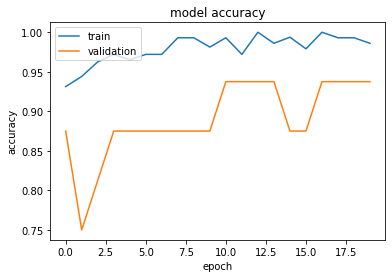

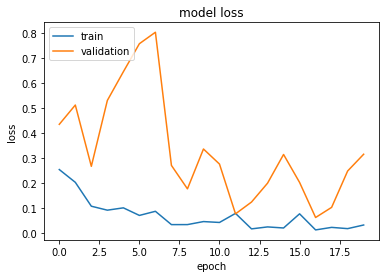

In [64]:
def performanc_plot_acc(history):
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

def performanc_plot_loss(history):
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

performanc_plot_acc(history)
performanc_plot_loss(history)

In [65]:
test_data_generator = ImageDataGenerator(rescale=1./255)
test_generator = test_data_generator.flow_from_directory( './Cat_Dog_Horse/test/', target_size=(224,224), batch_size=1, class_mode='categorical',color_mode='rgb',shuffle=False)
#class id

y_true = test_generator.classes
#predict

test_generator.reset()
pred_prob = []
for i in range(len(y_true)):
    pred = model.predict(test_generator[i][0])
    pred_prob.append(np.array(pred))
#prediction result

pred_prob = np.array(pred_prob).reshape(len(y_true),3)
df_pred = pd.DataFrame(pred_prob)
df_class = df_pred.idxmax(axis=1)

Found 16 images belonging to 3 classes.


In [72]:
y_real = y_true
y_pred = model.predict_generator(test_generator, steps=len(test_generator)).argmax(axis=-1)
target_name = test_generator.class_indices
print(confusion_matrix(y_real, y_pred),'\n')
print(y_real)
print(y_pred)
print(classification_report(y_real, y_pred, target_names=target_name))

<ipython-input-72-68772a50dbe4>:2: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  y_pred = model.predict_generator(test_generator, steps=len(test_generator)).argmax(axis=-1)


[[5 0 0]
 [3 3 0]
 [0 0 5]] 

[0 0 0 0 0 1 1 1 1 1 1 2 2 2 2 2]
[0 0 0 0 0 1 1 0 0 0 1 2 2 2 2 2]
              precision    recall  f1-score   support

        cats       0.62      1.00      0.77         5
        dogs       1.00      0.50      0.67         6
      horses       1.00      1.00      1.00         5

    accuracy                           0.81        16
   macro avg       0.88      0.83      0.81        16
weighted avg       0.88      0.81      0.80        16

